**Практическая работа #5. 4. МЕТОДЫ МАШИННОГО ОБУЧЕНИЯ В ЗАДАЧАХ ТЕСТИРОВАНИЯ НА ПРОНИКНОВЕНИЕ И ПОИСКА УЯЗВИМОСТЕЙ.**

Работу выполнил студент:

группы: ББМО-01-23

Белов Владимир Станиславович

**Задание 1. Разработать модуль spider для получения данных с веб-приложений в формализованном виде**

Установим библиотеки, необходимые для работы.

In [12]:
!pip install scrapy
!scrapy startproject spider

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.1/290.1 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.8/247.8 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.6/97.6 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 kB 7.2 MB/s eta 0:00:00
New Scrapy project 'spider', using template directory '/usr/local/lib/python3.10/dist-packages/scrapy/templates/project', created in:
    /content/spider

You can start your first spider with:
    cd spider
    scrapy genspider example example.com


Создание краулера на базе Scrapy

In [69]:
%%writefile spider/spider/spiders/spider.py
import scrapy

class QuoteSpider(scrapy.Spider):
    name = 'scrapy_spider'
    allowed_domains = ['quotes.toscrape.com']
    start_urls = ['http://quotes.toscrape.com/']

    def parse(self, response):
        for quote in response.css('div.quote'):
            yield {
                'text': quote.css('span.text::text').get(),
                'author': quote.css('span small::text').get(),
                'tags': quote.css('div.tags a.tag::text').getall(),
            }

        yield from response.follow_all(css='li.next a', callback=self.parse)

Overwriting spider/spider/spiders/spider.py


Создадим файл с результатом

In [70]:
!cd spider && scrapy crawl scrapy_spider -o text_author_tags.json

2024-06-27 22:54:36 [scrapy.utils.log] INFO: Scrapy 2.11.2 started (bot: spider)
2024-06-27 22:54:36 [scrapy.utils.log] INFO: Versions: lxml 4.9.4.0, libxml2 2.10.3, cssselect 1.2.0, parsel 1.9.1, w3lib 2.2.1, Twisted 24.3.0, Python 3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0], pyOpenSSL 24.1.0 (OpenSSL 3.2.2 4 Jun 2024), cryptography 42.0.8, Platform Linux-6.1.85+-x86_64-with-glibc2.35
2024-06-27 22:54:36 [scrapy.addons] INFO: Enabled addons:
[]
2024-06-27 22:54:36 [asyncio] DEBUG: Using selector: EpollSelector
2024-06-27 22:54:36 [scrapy.utils.log] DEBUG: Using reactor: twisted.internet.asyncioreactor.AsyncioSelectorReactor
2024-06-27 22:54:36 [scrapy.utils.log] DEBUG: Using asyncio event loop: asyncio.unix_events._UnixSelectorEventLoop
2024-06-27 22:54:36 [scrapy.extensions.telnet] INFO: Telnet Password: 6033a6bbdcfa70f9
2024-06-27 22:54:36 [scrapy.middleware] INFO: Enabled extensions:
['scrapy.extensions.corestats.CoreStats',
 'scrapy.extensions.telnet.TelnetConsole',
 'scrap

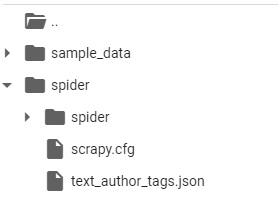

Импорт файла в таблицный формат

In [66]:
import pandas as pd

df = pd.read_json('/content/spider/text_author_tags.json')

ValueError: Trailing data

Выведем результат в виде гистограмма

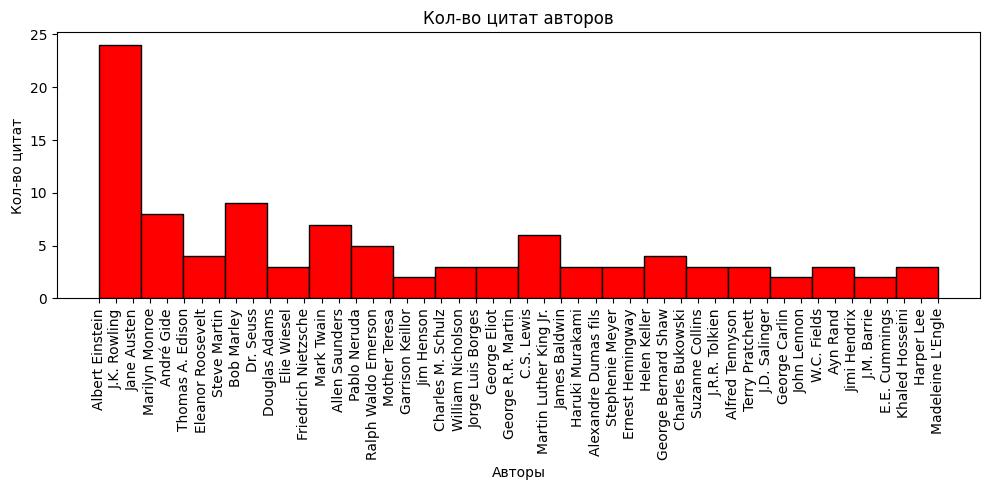

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_json('/content/spider/text_author_tags.json')

plt.figure(figsize=(10,5))
plt.hist(df['author'], bins=20, color='red', edgecolor='black')
plt.title('Кол-во цитат авторов')
plt.xlabel('Авторы')
plt.ylabel('Кол-во цитат')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()